# **VISUALIZATION**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\NOOR AL MUSABAH\Desktop\eda-project\data\cleaned_day2.csv",parse_dates=["Date"])
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


## **Measured Air Pollutants and Meteorological Variables**
  
    
- O₃: Formed through sunlight-driven chemical reactions (secondary pollutant)
- PM10: Dust, road particles, industrial emissions  
- PM2.5: Combustion, vehicles, industrial processes  
- NO₂: Traffic and fossil fuel burning  
- CO : Incomplete combustion  
- SO₂ : A toxic gas produced mainly from fossil fuel combustion that can irritate the respiratory system and affect air quality.
- PM2.5 remains a critical public health concern due to its fine particle size, which allows deep penetration into the lungs and bloodstream.  
- So lower average ≠ lower risk.  


## **Average PM2.5 by Month**  
- PM2.5 originates from various sources, including vehicle emissions, industrial processes, power plants, construction activities, and the burning of fossil fuels and biomass.  
- In air quality monitoring, PM2.5 is considered one of the most critical indicators of pollution severity and is commonly used in calculating the Air Quality Index (AQI). 

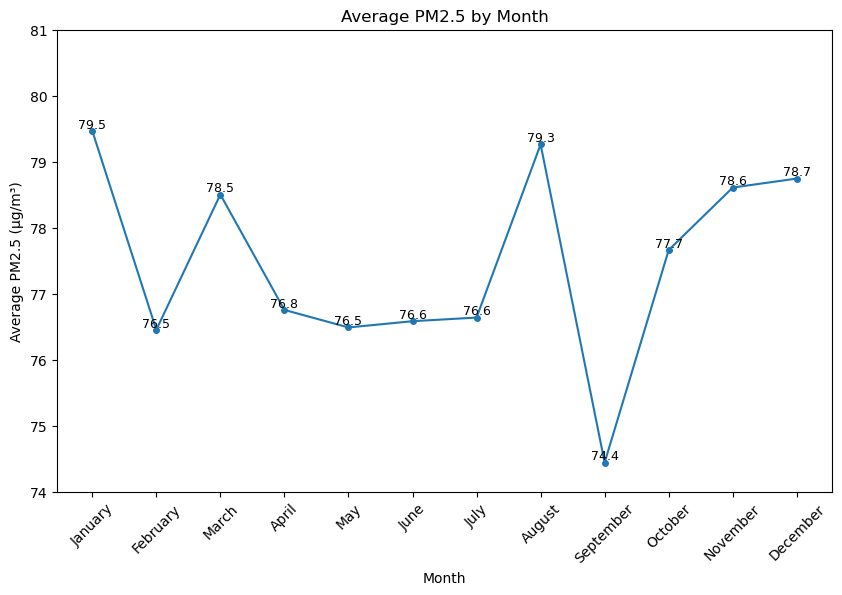

In [18]:
import calendar
plt.figure(figsize=(10,6))
monthly_pm2_5=df.groupby(df["Date"].dt.month)["PM2.5"].mean()
plt.plot(monthly_pm2_5.index,monthly_pm2_5.values,marker='o',markersize=4)
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Average PM2.5 by Month")
plt.xticks(range(1,13),calendar.month_name[1:13],rotation=45)
for x, y in zip(monthly_pm2_5.index, monthly_pm2_5.values):
    plt.text(x, y, f"{y:.1f}", ha='center', va='bottom',fontsize=9)
# monthly_pm2_5
plt.ylim(74,81)
# plt.savefig("C:\Users\NOOR AL MUSABAH\Desktop\eda-project\report\Average PM2.5 by Month.png")
plt.savefig("C:/Users/NOOR AL MUSABAH/Desktop/eda-project/report/Average_PM2.5_by_Month.png",
            dpi=300, bbox_inches='tight')
# "C:\Users\NOOR AL MUSABAH\Desktop\eda-project\notebooks\02_cleaning_preprocessing.ipynb"
plt.show()

- The monthly global average PM2.5 levels show moderate seasonal fluctuation, with peaks in January and August and a notable dip in September.
- indicating potential meteorological and seasonal influences on air pollution patterns.  
- Promote clean energy usage  
- Implement seasonal pollution control strategies  
- Encourage public transport & EV adoption

In [119]:
country_avg = df.groupby("Country")["PM2.5"].mean().sort_values(ascending=False)

country_avg

Country
UAE             80.013692
Australia       78.933560
India           78.901167
Japan           78.867475
Mexico          78.855054
China           78.627848
Russia          77.878610
Canada          77.827645
Turkey          77.711220
South Africa    77.666008
UK              77.614908
Thailand        77.461483
USA             77.113680
Germany         76.974277
Egypt           76.888451
Brazil          75.669532
Spain           75.434768
South Korea     74.802471
France          74.694622
Name: PM2.5, dtype: float64

## **Monthly PM2.5 Trend by Country (2023)**

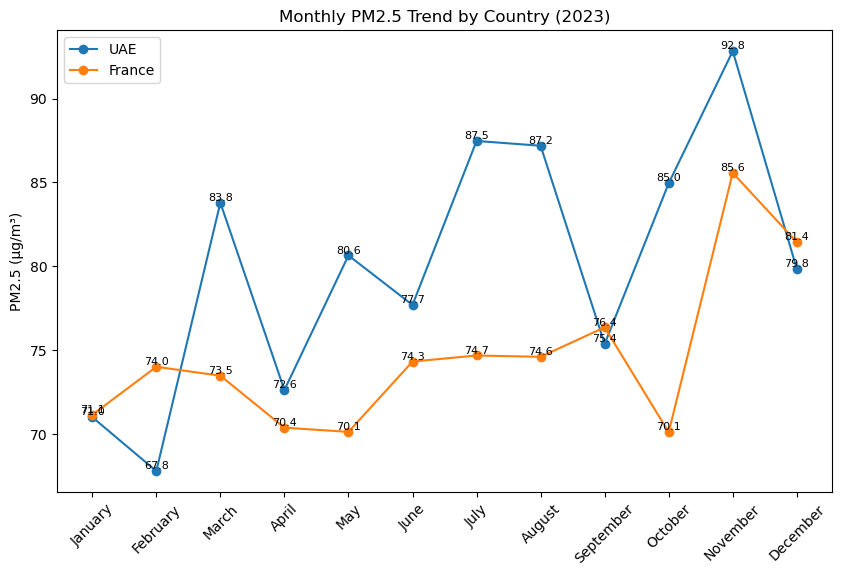

In [20]:
import calendar
countries = ["UAE", "France",]
plt.figure(figsize=(10,6))
for country in countries:
    country_df = df[df["Country"] == country]
    monthly = country_df.groupby(country_df["Date"].dt.month)["PM2.5"].mean()
    plt.plot(monthly.index, monthly.values, marker='o', label=country)
    for x, y in zip(monthly.index, monthly.values):
        plt.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=8)
plt.xticks(range(1,13), calendar.month_name[1:13], rotation=45)
plt.title("Monthly PM2.5 Trend by Country (2023)")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.savefig("C:/Users/NOOR AL MUSABAH/Desktop/eda-project/report/Monthly PM2.5 Trend by Country (2023).png",
            dpi=300, bbox_inches='tight')
plt.show()


- The monthly PM2.5 trend indicates noticeable seasonal variation in both countries.
- UAE shows higher fluctuation and stronger peaks, particularly in November, likely influenced by climatic factors such as dust and dry weather.
-  France demonstrates relatively stable levels but shows increased concentrations during colder months, possibly due to heating-related emissions.

## **Average Pollutant Concentration (2023)**

In [9]:
pollutants = ["PM2.5", "PM10", "NO2", "O3", "CO"]
avg_pollution = df[pollutants].mean().sort_values(ascending=False)
avg_pollution


O3       106.031643
PM10     104.438161
PM2.5     77.448439
NO2       52.198649
CO         5.047984
dtype: float64

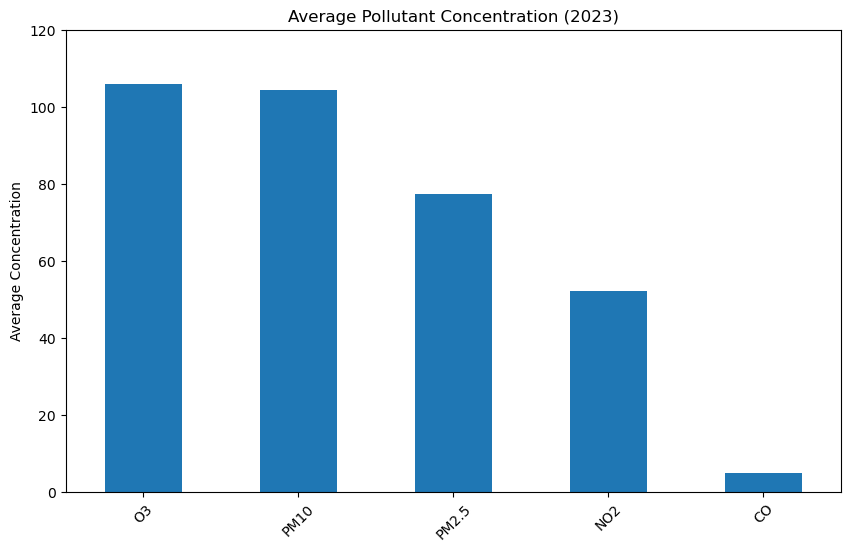

In [21]:
plt.figure(figsize=(10,6))
avg_pollution.plot(kind="bar")
plt.title("Average Pollutant Concentration (2023)")
plt.ylabel("Average Concentration")
plt.xticks(rotation=45)
plt.ylim(0,120)
plt.savefig("C:/Users/NOOR AL MUSABAH/Desktop/eda-project/report/Average Pollutant Concentration (2023).png",dpi=300, bbox_inches='tight')
plt.show()


- The analysis indicates that O₃ and PM10 are the most dominant pollutants in terms of average concentration.  
- However, from a health-risk perspective, PM2.5 remains highly significant despite its comparatively lower numerical value.
  
### **Solutions**
- Reduce vehicular emissions  
- Promote renewable energy  
- Control construction dust  
- Improve urban green cover

## **Distribution of PM2.5 Levels**

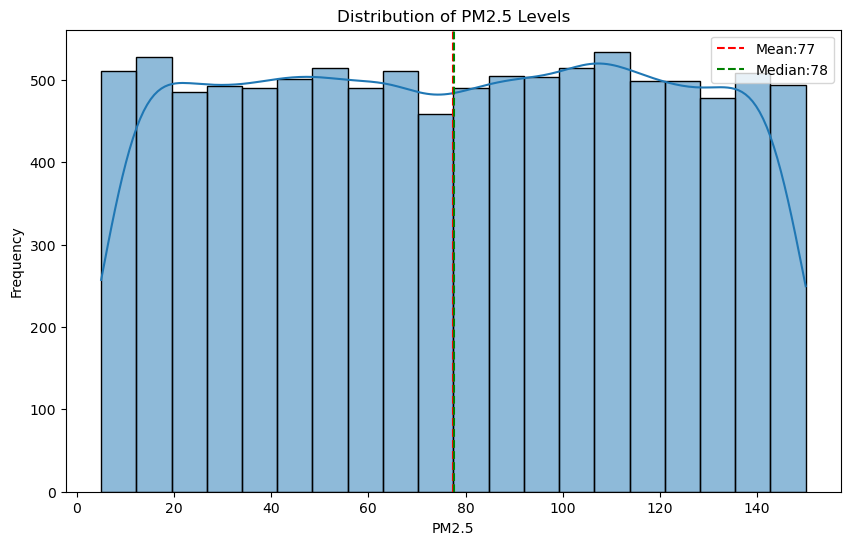

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df["PM2.5"], bins=20,kde=True)

plt.axvline(df["PM2.5"].mean(),color='red',linestyle='--',label=f"Mean:{df["PM2.5"].mean():.0f}")
plt.axvline(df["PM2.5"].median(),color='green',linestyle='--',label=f"Median:{df["PM2.5"].median():.0f}")

plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.title("Distribution of PM2.5 Levels")
plt.legend()
plt.savefig("C:/Users/NOOR AL MUSABAH/Desktop/eda-project/report/Distribution of PM2.5 Levels.png",dpi=300, bbox_inches='tight')

plt.show()


In [93]:
df["PM2.5"].skew()


np.float64(-0.005623537690858805)

- The PM2.5 distribution is approximately symmetric (skew ≈ 0), with a mean of 77 and median of 78
- indicating stable pollution levels.
-  The absence of strong skewness suggests that extreme pollution events are limited.
-   the average level falls within the moderate pollution category.

## **Average Temperature vs Humidity by Country**

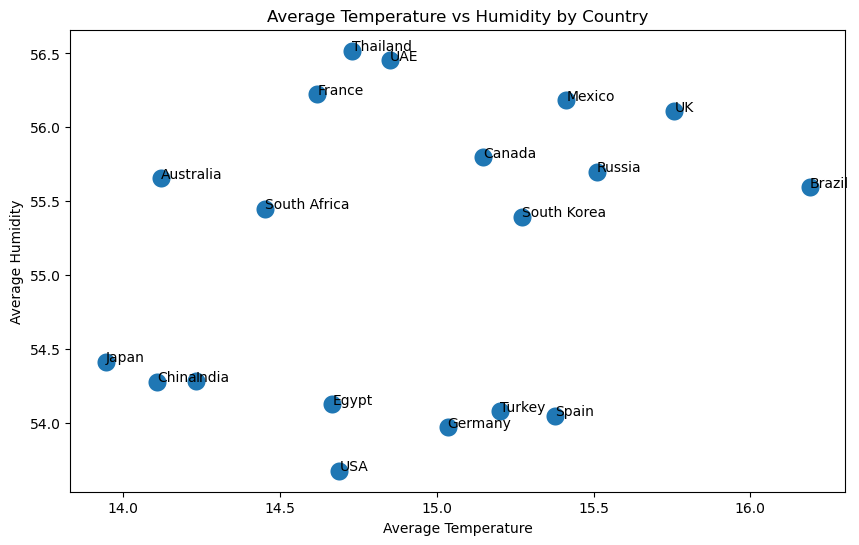

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by country
country_avg = df.groupby("Country")[["Temperature", "Humidity"]].mean().reset_index()

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=country_avg,
    x="Temperature",
    y="Humidity",
    s=200   # Bigger points
)
for i in range(len(country_avg)):
    plt.text(
        country_avg["Temperature"][i],
        country_avg["Humidity"][i],
        country_avg["Country"][i])
plt.title("Average Temperature vs Humidity by Country")
plt.xlabel("Average Temperature")
plt.ylabel("Average Humidity")
plt.savefig("C:/Users/NOOR AL MUSABAH/Desktop/eda-project/report/Average Temperature vs Humidity by Country.png",dpi=300, bbox_inches='tight')

plt.show()



- The scatterplot indicates that temperature and humidity show a weak relationship across countries.
- The points are slightly trending upward but are widely scattered.
- indicating that temperature has only a small influence on humidity.

In [95]:
country_avg[["Temperature","Humidity"]].corr()


,Temperature,Humidity
Temperature,1.000000,0.273569
Humidity,0.273569,1.000000


- temperature and humidity show a weak positive correlation (r = 0.27), correlation does not imply causation.
-  The relationship indicates association but does not confirm that temperature directly influences humidity.

## **Distribution of Pollutants**

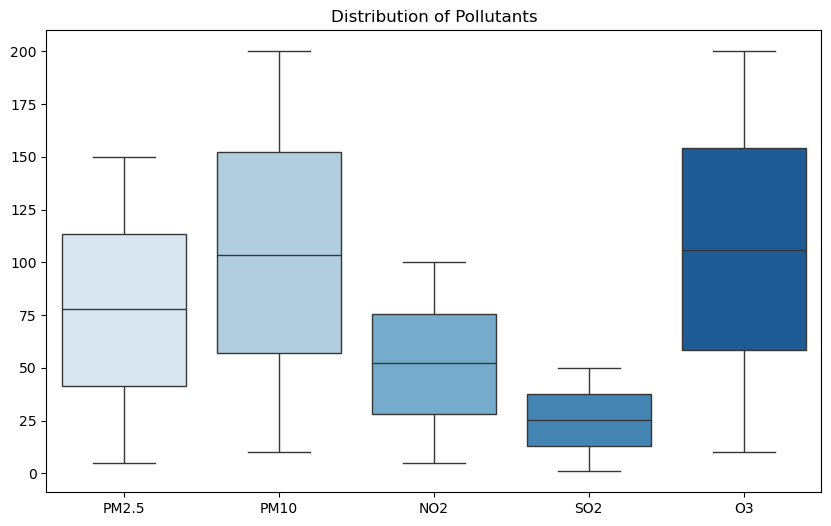

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df[["PM2.5","PM10","NO2",'SO2','O3']],palette="Blues", saturation=0.8)
plt.title("Distribution of Pollutants")
plt.savefig("C:/Users/NOOR AL MUSABAH/Desktop/eda-project/report/Distribution of Pollutants.png",dpi=300, bbox_inches='tight')

plt.show()


- The boxplot compares the distribution of five major pollutants: PM2.5, PM10, NO₂, SO₂, and O₃.
- The boxplot analysis reveals that PM10 and O₃ exhibit the highest median concentration levels and the greatest variability among the pollutants, indicating their dominant contribution to air pollution.
-  PM2.5 shows moderate levels, while NO₂ and SO₂ demonstrate comparatively lower concentrations.
-   The wide interquartile ranges observed for PM10 and O₃ suggest significant fluctuations over time, potentially reflecting seasonal or environmental influences.

## **Correlation Heatmap of Pollutants**

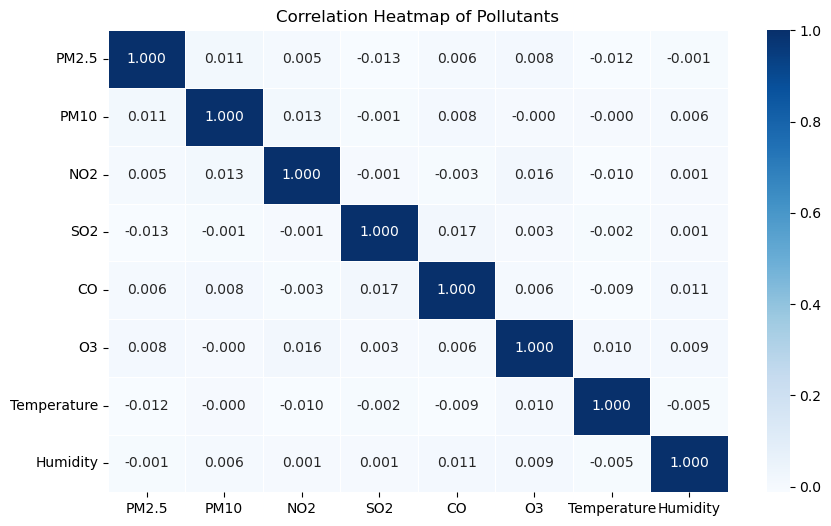

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

corr_matrix = df[['PM2.5','PM10','NO2','SO2','CO','O3','Temperature',"Humidity"]].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    fmt=".3f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Pollutants")
plt.savefig("C:/Users/NOOR AL MUSABAH/Desktop/eda-project/report/Correlation Heatmap of Pollutants.png",dpi=300, bbox_inches='tight')

plt.show()


- All pollutants and weather variables show very low correlations (mostly near 0).
- Air pollutant levels are largely independent of each other and also independent of Temperature and Humidity in this dataset.
- pollution mitigation strategies should target pollutants individually